# Relatório

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import datetime as dt
%config InlineBackend.figure_format ='retina'

In [54]:
data = pd.read_csv('../../DATABASE/base_estudos.csv') 

In [55]:
data['data_entrada'] = pd.TimedeltaIndex(data['data_entrada'], unit='d') + dt.datetime(1900,1,1)
data['data_final'] = pd.TimedeltaIndex(data['data_final'], unit='d') + dt.datetime(1900,1,1)
data = data.drop(['id_cliente',  'id_contrato', 'id_produto','data_entrada.1', ], axis=1)

In [56]:
data.columns

Index(['data_entrada', 'valor_fin', 'qtde_prest', 'juros_efet', 'data_final',
       'provisao', 'fat', 'rating_operacao', 'rating_cliente', 'ra', 'porte',
       'setor', 'situacao', 'rating_atual', 'linha_fin', 'tipo_a', 'tipo_b',
       'tipo_c', 'tipo_d', 'garantia', 'valor_garantia'],
      dtype='object')

In [5]:
data.head()

,data_entrada,valor_fin,qtde_prest,juros_efet,data_final,provisao,fat,rating_operacao,rating_cliente,ra,...,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia
0,2015-12-13,151605.74,63.0,0.246781,2022-02-17,0,7481,AA,B,RA de Santos,...,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0
1,2015-12-31,133864.13,62.0,0.246802,2022-02-17,0,6482,AA,B,RA de Santos,...,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,219000.0
2,2015-12-13,156163.26,65.0,0.246774,2022-04-20,45392,960378,A,B,RA de Santos,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0
3,2015-12-13,132834.93,67.0,0.246793,2022-06-17,397,1005795,A,A,RA de Santos,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,197000.0
4,2015-12-13,147130.53,63.0,0.246785,2022-02-17,41467,813483,A,A,RA de Santos,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,268000.0


## Cálculo trimestral e semestral

In [6]:
data['trimestral_entrada'] = data['data_entrada'].dt.quarter
data['trimestral_final'] = data['data_final'].dt.quarter

In [38]:
data_n = str(data['data_final'][0]).split()[0]
data_n = data_n.split("-")
print(data_n[0])

2022


In [43]:
data_teste = data_n[0] + '.' + str(data.loc[0]['semestral_entrada'])
type(data_teste)

str

In [40]:
data['semestral_entrada'] = np.where(data.trimestral_entrada.isin([1,2]),1,2)
data['semestral_final'] = np.where(data.trimestral_final.isin([1,2]),1,2)

In [8]:
data.head()

,data_entrada,valor_fin,qtde_prest,juros_efet,data_final,provisao,fat,rating_operacao,rating_cliente,ra,...,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia,trimestral_entrada,trimestral_final,semesteral_entrada,semesteral_final
0,2015-12-13,151605.74,63.0,0.246781,2022-02-17,0,7481,AA,B,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0,4,1,2,1
1,2015-12-31,133864.13,62.0,0.246802,2022-02-17,0,6482,AA,B,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,219000.0,4,1,2,1
2,2015-12-13,156163.26,65.0,0.246774,2022-04-20,45392,960378,A,B,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0,4,2,2,1
3,2015-12-13,132834.93,67.0,0.246793,2022-06-17,397,1005795,A,A,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,197000.0,4,2,2,1
4,2015-12-13,147130.53,63.0,0.246785,2022-02-17,41467,813483,A,A,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,268000.0,4,1,2,1


## Indexing

.loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. 

In [45]:
# data.loc[:]['valor_fin'].head()
data.loc[:]['valor_financiamento'].head() # <=== Erro

KeyError: 'valor_financiamento'

.iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics)

In [48]:
# data.iloc[:]['valor_fin'].head()
# numero_de_linhas = data.shape[0]
# for linha in range(numero_de_linhas + 1):
#     data.iloc[linha]
size = data.shape
#data.iloc[:][data.shape[1] + 1]

KeyError: 28

## Slicing

In [22]:
new_df_1 = data.iloc[0:3, 1:4]

In [23]:
new_df_2 = data.loc[0:3, 'valor_fin']

## Subsetting

In [25]:
new_df_3 = data[(data.fat >= 10000) & (data.fat <= 100000)]

In [39]:
new_df_4 = data[(data['semesteral_final'] != 1) & (data['valor_fin'] > 146578.09)]

In [41]:
new_df_4.head()

,data_entrada,valor_fin,qtde_prest,juros_efet,data_final,provisao,fat,rating_operacao,rating_cliente,ra,...,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia,trimestral_entrada,trimestral_final,semesteral_entrada,semesteral_final
18,2013-08-22,275436.77,92.0,0.332849,2021-07-17,2758,1481417,A,A,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,252500.0,3,3,2,2
20,2013-09-29,240535.94,92.0,0.412908,2021-09-17,0,70598,AA,AA,Região Metropolitana de São Paulo,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,219000.0,3,3,2,2
21,2013-10-27,280782.03,92.0,0.413329,2021-09-17,0,12847,AA,AA,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,276000.0,4,3,2,2
22,2013-10-23,275296.38,92.0,0.413173,2021-09-17,0,907351,AA,A,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,252500.0,4,3,2,2
23,2013-10-26,273320.56,92.0,0.413335,2021-09-17,0,8200,AA,A,RA de Santos,...,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,248000.0,4,3,2,2


## BoxPlot

In [60]:
data_boxplot = data.select_dtypes(include=['int64','float64']).copy()
data_boxplot

,valor_fin,qtde_prest,provisao,fat,valor_garantia
0,151605.74,63.0,0,7481,245000.00
1,133864.13,62.0,0,6482,219000.00
2,156163.26,65.0,45392,960378,245000.00
3,132834.93,67.0,397,1005795,197000.00
4,147130.53,63.0,41467,813483,268000.00
...,...,...,...,...,...
2547,560763.83,120.0,565069,1,354000.00
2548,53194.04,120.0,159906,1,105292.20
2549,4793407.28,60.0,0,814103582,37280000.00
2550,182281.79,60.0,550677,1,191773.14


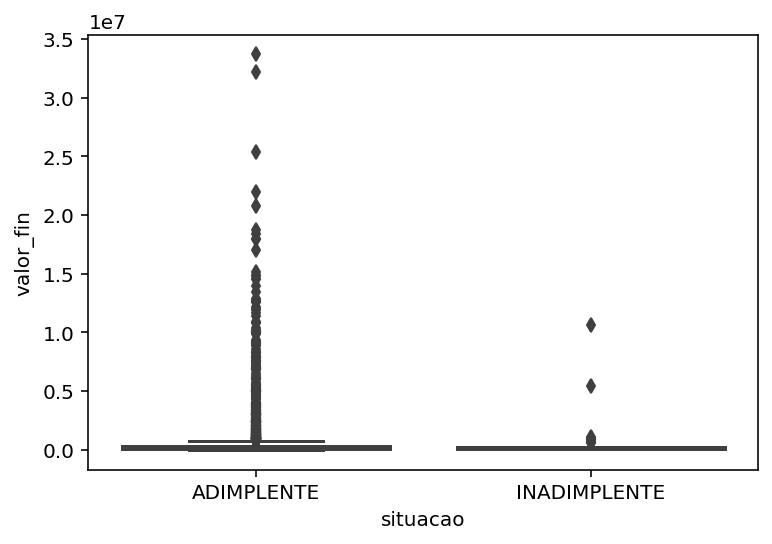

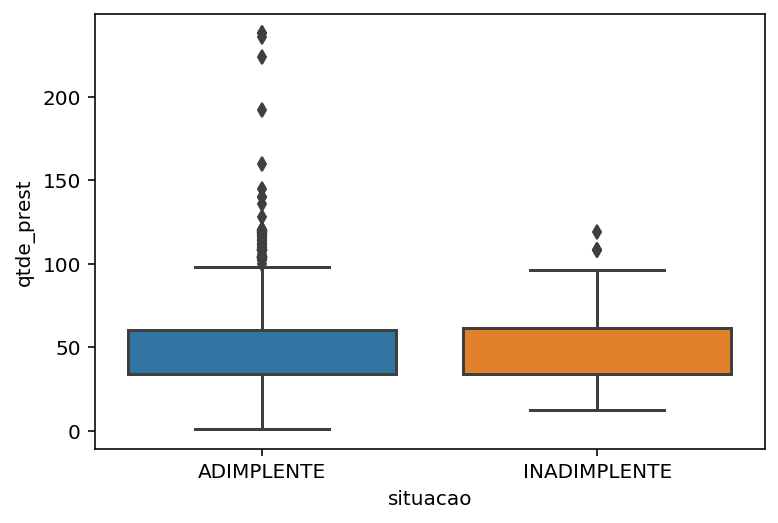

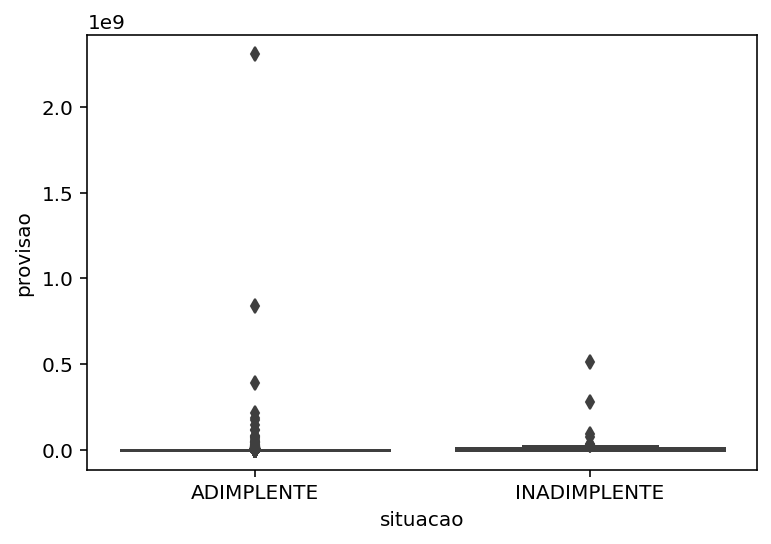

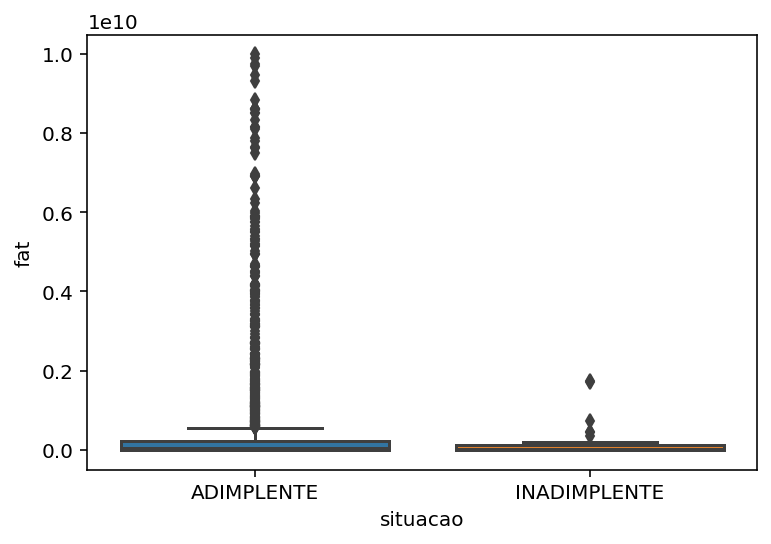

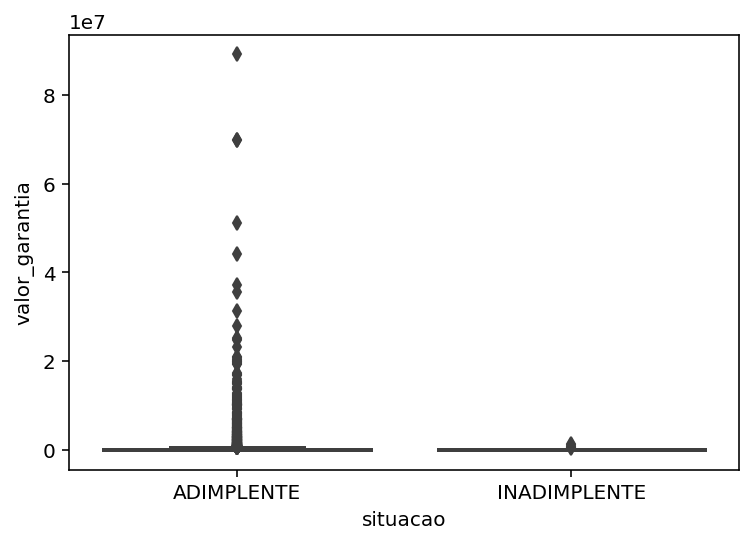

In [67]:

for column in data_boxplot.columns:
    plt.figure()
    sns.boxplot(x = data['situacao'],
                    y = data_boxplot[column])


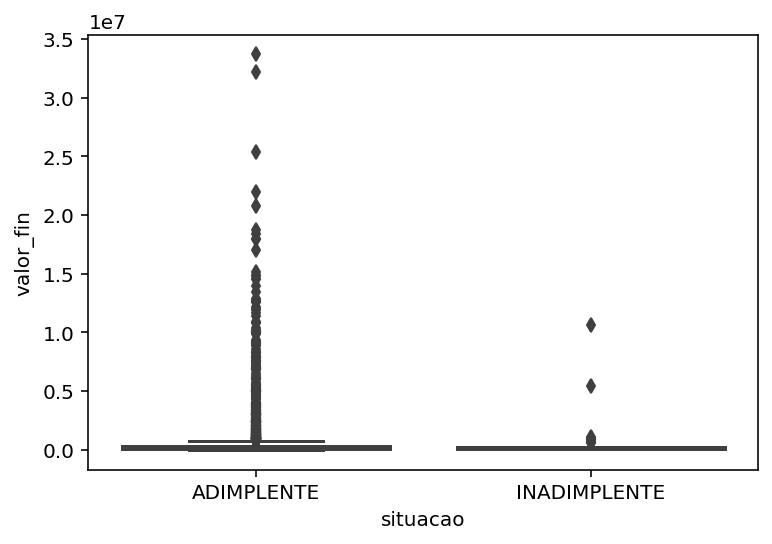

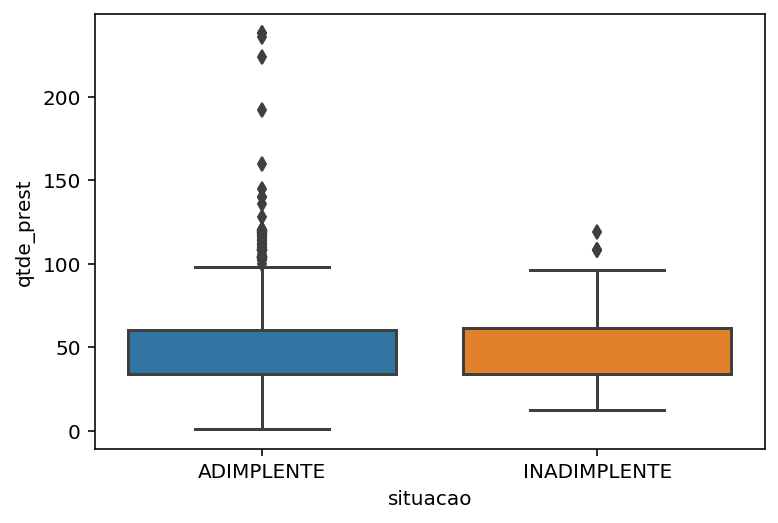

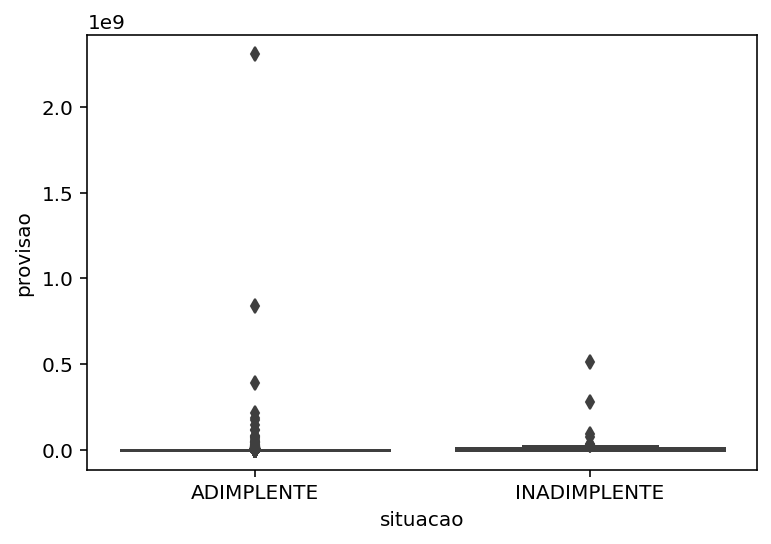

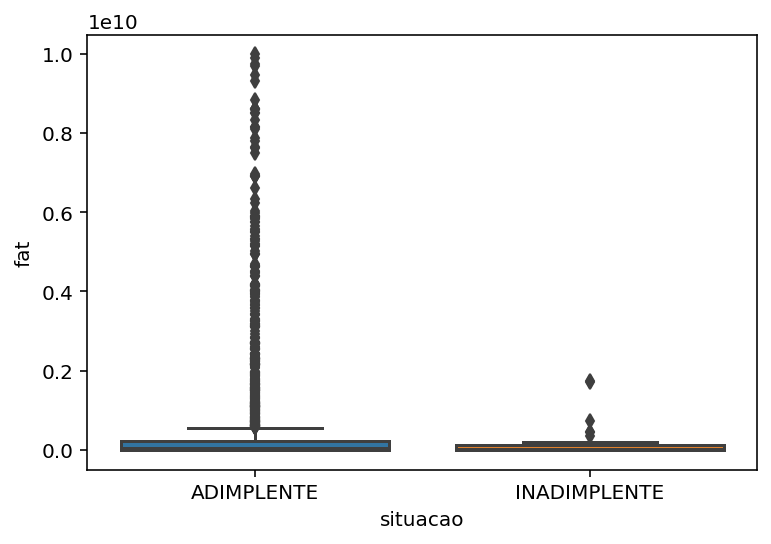

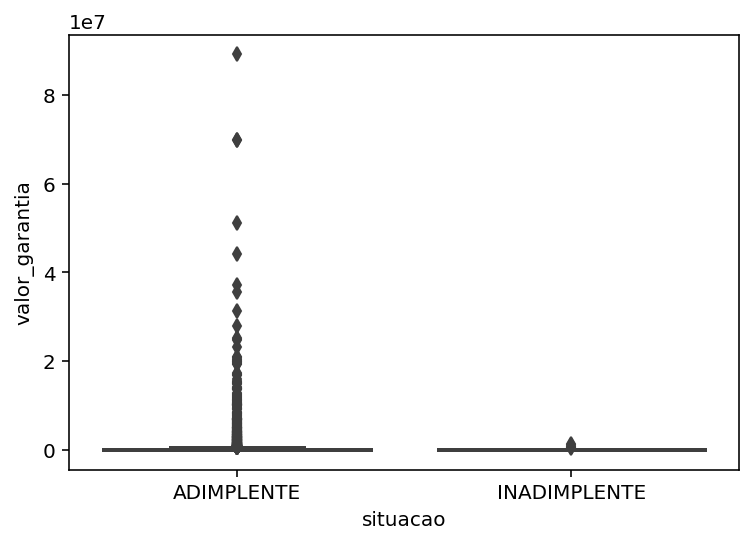